In [ ]:
#import libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

#classifier
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data=pd.read_csv('Resume.csv')
df, resume_test_data = train_test_split(data, test_size=0.15,stratify=data['Category'], random_state=42)
resume_test_data.to_csv('test_df.csv', index=False)


In [ ]:
df.head()

,ID,Resume_str,Resume_html,Category
1443,16066857,SENIOR EXECUTIVE CHEF Execu...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
56,52979663,SENIOR HR Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
1131,15281412,CONSULTANT Summary Transitio...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT
2472,16279537,SUPERVISORY LOGISTICS MANAGEMENT SPEC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
1710,24647794,ENGINEERING INTERN Profile ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2111 entries, 1443 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2111 non-null   int64 
 1   Resume_str   2111 non-null   object
 2   Resume_html  2111 non-null   object
 3   Category     2111 non-null   object
dtypes: int64(1), object(3)
memory usage: 82.5+ KB


Here we see, there are 4 columns such as ID, Resume_str, Resume_html, and Category. Category columns are our target columns, and the rest of the target columns are used to train the model.

In [ ]:
df.shape

(2111, 4)

In [ ]:
df['Category'].unique()

array(['CHEF', 'HR', 'CONSULTANT', 'AVIATION', 'ENGINEERING', 'BANKING',
       'BUSINESS-DEVELOPMENT', 'ADVOCATE', 'FINANCE', 'DIGITAL-MEDIA',
       'CONSTRUCTION', 'HEALTHCARE', 'DESIGNER', 'AGRICULTURE', 'ARTS',
       'FITNESS', 'TEACHER', 'PUBLIC-RELATIONS', 'APPAREL',
       'INFORMATION-TECHNOLOGY', 'ACCOUNTANT', 'SALES', 'BPO',
       'AUTOMOBILE'], dtype=object)

In [ ]:
df['Category'].value_counts()

Category
BUSINESS-DEVELOPMENT      102
INFORMATION-TECHNOLOGY    102
CHEF                      100
ENGINEERING               100
ADVOCATE                  100
FINANCE                   100
ACCOUNTANT                100
AVIATION                   99
SALES                      99
FITNESS                    99
CONSULTANT                 98
BANKING                    98
HEALTHCARE                 98
CONSTRUCTION               95
PUBLIC-RELATIONS           94
HR                         93
DESIGNER                   91
ARTS                       88
TEACHER                    87
APPAREL                    82
DIGITAL-MEDIA              82
AGRICULTURE                54
AUTOMOBILE                 31
BPO                        19
Name: count, dtype: int64

In [ ]:
len(df['Category'].value_counts())

24

# Exploratory Data Analysis (EDA)

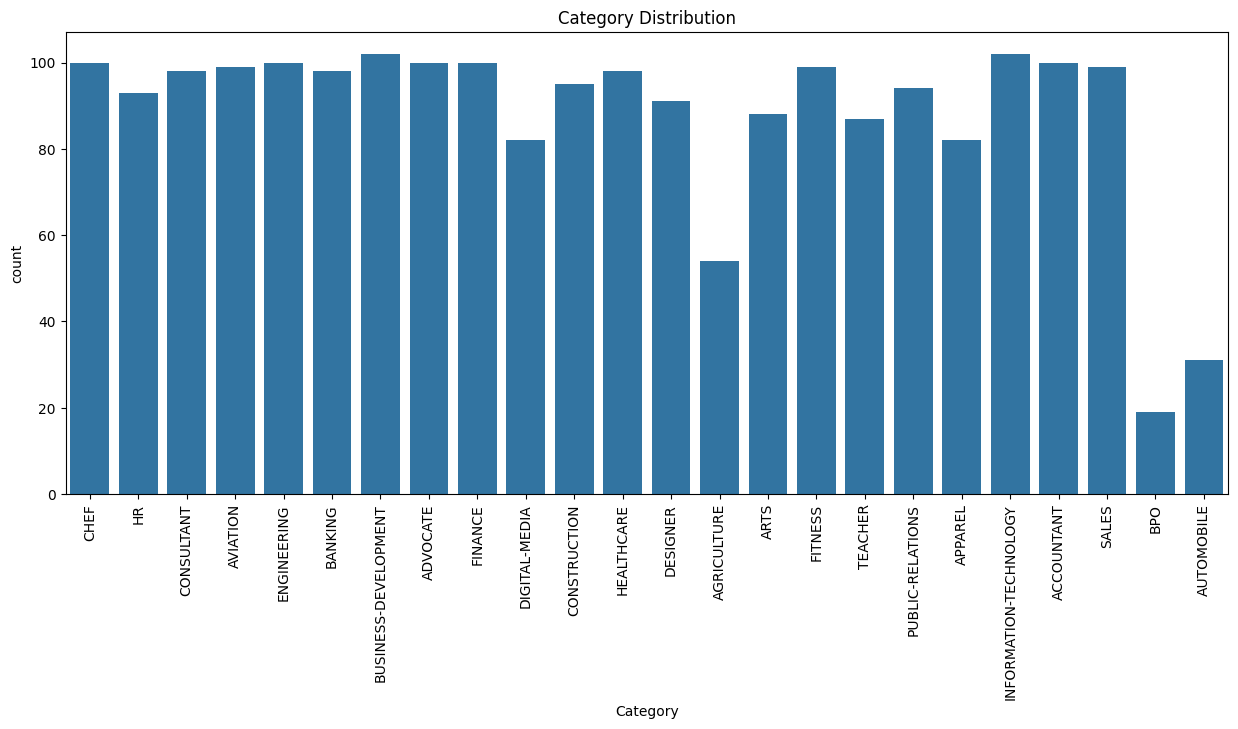

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()


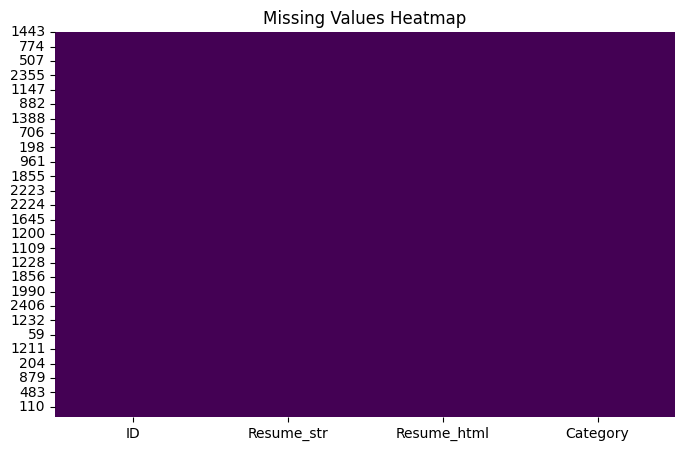

In [ ]:
missing_values = df.isnull().sum()


plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

## Cleaning function


In [ ]:
"""
The `resume_cleaning` function provided here is designed to preprocess resume text data for analysis. It employs a series of text cleaning steps, including removing HTML tags using regular expressions, eliminating non-alphabetic characters, digits, and multiple whitespaces, as well as replacing URLs with a space. Next, the text is converted to lowercase and tokenized using the NLTK library's word_tokenize function. Stopwords from the English language are removed, and stemming is applied to reduce words to their root form using the Porter stemming algorithm. Finally, the cleaned and preprocessed text is returned for further analysis or modeling.
"""


def resume_cleaning(text):

    cleaned_text = re.sub(r'<.*?>', ' ', text)


    cleaned_text = re.sub('[^a-zA-Z]', ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]|_', ' ', cleaned_text)
    cleaned_text = re.sub(r'\d+', ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text=re.sub('http\S+\s', " ", cleaned_text)



    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    words = word_tokenize(cleaned_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)

    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    cleaned_text = ' '.join(stemmed_words)

    return cleaned_text




In [ ]:
#now apply text cleaning function in my dataset
df['Cleaned_Resume']=df['Resume_str'].apply(lambda x:resume_cleaning(x))

In [ ]:
df.head()

,ID,Resume_str,Resume_html,Category,Cleaned_Resume
1443,16066857,SENIOR EXECUTIVE CHEF Execu...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,senior execut chef execut profil seek employ e...
56,52979663,SENIOR HR Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,senior hr highlight safeti managementemploye e...
1131,15281412,CONSULTANT Summary Transitio...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,consult summari transit applic develop secur p...
2472,16279537,SUPERVISORY LOGISTICS MANAGEMENT SPEC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,supervisori logist manag specialist summari ta...
1710,24647794,ENGINEERING INTERN Profile ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,engin intern profil profici entri level electr...


In [ ]:
# check any internal pdf are empty or not after cleaning procedure.

empty_rows = df[df['Cleaned_Resume'] == '']
print(empty_rows)

           ID             Resume_str  \
656  12632728                          

                                           Resume_html              Category  \
656  <div class="fontsize fontface vmargins hmargin...  BUSINESS-DEVELOPMENT   

    Cleaned_Resume  
656                 


In [ ]:
# Drop 'Resume_str' and "Resume_html" columns
df=df.drop(['Resume_str', 'Resume_html'], axis=1)

# Drop the rows with empty cleaned text
df = df.drop(empty_rows.index)


In [ ]:
#after cleaning and droping extra columns and others

df.Cleaned_Resume[0]

'hr administr market associ hr administr summari dedic custom servic manag year experi hospit custom servic manag respect builder leader custom focus team strive instil share enthusiast commit custom servic highlight focus custom satisfact team manag market savvi conflict resolut techniqu train develop skill multi tasker client relat specialist accomplish missouri dot supervisor train certif certifi ihg custom loyalti market segment hilton worldwid gener manag train certif accomplish trainer cross server hospit system hilton onq micro opera pm fidelio opera reserv system or holidex complet cours seminar custom servic sale strategi inventori control loss prevent safeti time manag leadership perform assess experi hr administr market associ hr administr dec current compani name citi state help develop polici direct coordin activ employ compens labor relat benefit train employe servic prepar employe separ notic relat document keep record benefit plan particip insur pension plan personnel t

In [ ]:

categories = np.sort(df['Category'].unique())
categories

df_categories = [df[df['Category'] == category].loc[:, ['Cleaned_Resume', 'Category']] for category in categories]


In [ ]:
"""
The `remove_extra_word` function defined here aims to eliminate common, non-informative terms from resume text. The function takes a text input and removes specified extra words such as 'company', 'name', 'city', 'state', 'work', and 'manager' using a predefined list. It splits the text into individual words, filters out the extra words, and rejoins the remaining words into a cleaned text string. This function is then applied to the 'Cleaned_Resume' column of the DataFrame `df` using a lambda function, effectively removing the specified extra words from each resume entry in the dataset.
"""

def remove_extra_word(text):

    extra_word=['compani', 'name', 'citi', 'state', 'work', 'manag'] # extra words
    words = text.split()
    filter_word = [word for word in words if word not in extra_word]

    filter_text = ' '.join(filter_word)

    return filter_text


# apply df['Cleaned_Resume']

df['Cleaned_Resume']=df['Cleaned_Resume'].apply(lambda x:remove_extra_word(x))




In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Category']=encoder.fit_transform(df['Category'])

In [ ]:
df.head()

,ID,Category,Cleaned_Resume
1443,16066857,10,senior execut chef execut profil seek employ e...
56,52979663,19,senior hr highlight safeti managementemploye e...
1131,15281412,12,consult summari transit applic develop secur p...
2472,16279537,6,supervisori logist specialist summari target f...
1710,24647794,15,engin intern profil profici entri level electr...


In [ ]:
df.Category.unique()

array([10, 19, 12,  6, 15,  7,  9,  1, 16, 14, 11, 18, 13,  2,  4, 17, 23,
       21,  3, 20,  0, 22,  8,  5])

<div style="color:Black; display:fill; border-radius:5px;background-color:#336b87;font-size:200%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">Dataset Splitting</div>

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(df['Cleaned_Resume'], df['Category'], test_size=0.15, random_state=42, stratify=df['Category'])


print("Train data size:", X_train.shape)
print("Validation data size:", X_valid.shape)


Train data size: (1793,)
Validation data size: (317,)


## Vectorization of TF-IDF


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

tfidf=TfidfVectorizer(stop_words='english',max_features=800)

In [ ]:

tfidf_train_vectors = tfidf.fit_transform(X_train)
tfidf_valid_vectors =tfidf.transform(X_valid)

In [ ]:
tfidf_train_vectors.shape

(1793, 800)

In [ ]:

tfidf.get_feature_names_out()

array(['abil', 'abl', 'academ', 'accept', 'access', 'accomplish',
       'accord', 'account', 'accur', 'accuraci', 'achiev', 'acquisit',
       'act', 'action', 'activ', 'ad', 'adapt', 'addit', 'address',
       'adher', 'adjust', 'administ', 'administr', 'adob', 'advanc',
       'advertis', 'advis', 'advoc', 'affili', 'agenc', 'agent',
       'agreement', 'aid', 'air', 'aircraft', 'align', 'allow', 'america',
       'american', 'analysi', 'analyst', 'analyt', 'analyz', 'annual',
       'answer', 'appli', 'applic', 'appoint', 'approach', 'appropri',
       'approv', 'april', 'architectur', 'area', 'armi', 'arrang', 'art',
       'aspect', 'assembl', 'assess', 'asset', 'assign', 'assist',
       'associ', 'assur', 'attend', 'attent', 'audit', 'august', 'author',
       'autom', 'avail', 'averag', 'aviat', 'awar', 'award', 'bachelor',
       'background', 'balanc', 'bank', 'base', 'basi', 'basic',
       'behavior', 'benefit', 'best', 'board', 'book', 'branch', 'brand',
       'budget', 

In [ ]:

accuracy_lis=[]
model_lis=[]

## Random Forest classifier


In [ ]:
#import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
RF = RandomForestClassifier()

RF.fit(tfidf_train_vectors,y_train)
# Predict on validation data
y_val_pred = RF.predict(tfidf_valid_vectors)


# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

accuracy=accuracy_score(y_valid, y_val_pred)
print("Accuracy is : ", accuracy)

# store info
model_lis.append("Random Forest Classifier")
accuracy_lis.append(accuracy*100)


Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.53      0.67      0.59        15
           1       0.75      0.80      0.77        15
           2       0.00      0.00      0.00         8
           3       0.88      0.58      0.70        12
           4       0.25      0.08      0.12        13
           5       0.00      0.00      0.00         5
           6       0.92      0.80      0.86        15
           7       0.62      0.53      0.57        15
           8       0.00      0.00      0.00         3
           9       0.67      0.67      0.67        15
          10       0.83      1.00      0.91        15
          11       0.73      0.79      0.76        14
          12       0.20      0.07      0.10        15
          13       0.85      0.79      0.81        14
          14       0.70      0.58      0.64        12
          15       0.71      0.80      0.75        15
          16       0.50      0.53      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regresssion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
"""
The logistic regression model was trained using TF-IDF vector representations of the training data and their corresponding labels. After fitting the model, predictions were made on the validation data, and a classification report was generated to evaluate the model's performance. Additionally, the accuracy of the model on the validation data was computed. This process was repeated for documentation purposes, with the model type ("Logistic Regression") and its accuracy being stored for reference.
"""

LR = LogisticRegression()

LR.fit(tfidf_train_vectors,y_train)
# Predict on validation data
y_val_pred = LR.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))

# store info
model_lis.append("Logistic Regression")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)


Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.47      0.60      0.53        15
           2       0.00      0.00      0.00         8
           3       0.73      0.67      0.70        12
           4       0.45      0.38      0.42        13
           5       1.00      0.20      0.33         5
           6       0.79      0.73      0.76        15
           7       0.70      0.47      0.56        15
           8       0.00      0.00      0.00         3
           9       0.62      0.67      0.65        15
          10       0.79      1.00      0.88        15
          11       0.80      0.57      0.67        14
          12       0.43      0.20      0.27        15
          13       0.67      0.71      0.69        14
          14       0.75      0.50      0.60        12
          15       0.62      0.67      0.65        15
          16       0.53      0.53      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize KNN classifier
k = 24 # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(tfidf_train_vectors,y_train)

# Predict on validation data
y_val_pred = knn_classifier.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))

# store info
model_lis.append("K Nearest Neighbors")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)


Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.46      0.80      0.59        15
           1       0.37      0.47      0.41        15
           2       0.00      0.00      0.00         8
           3       0.57      0.33      0.42        12
           4       0.50      0.15      0.24        13
           5       0.00      0.00      0.00         5
           6       0.80      0.53      0.64        15
           7       0.67      0.40      0.50        15
           8       0.00      0.00      0.00         3
           9       0.50      0.67      0.57        15
          10       0.75      1.00      0.86        15
          11       0.80      0.57      0.67        14
          12       0.50      0.07      0.12        15
          13       0.69      0.64      0.67        14
          14       0.88      0.58      0.70        12
          15       0.56      0.67      0.61        15
          16       0.56      0.33      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
"""
In the code snippet provided, a Multinomial Naive Bayes classifier is initialized and trained using TF-IDF vectors obtained from the training data. Subsequently, the trained classifier is employed to predict the labels for the validation data. The classification report, including precision, recall, and F1-score metrics, is printed to evaluate the model's performance on the validation dataset. Additionally, the accuracy score of the model on the validation data is calculated and displayed. Finally, the model name ("Naive Bayes") and its corresponding accuracy score are appended to lists for documentation and comparison purposes, respectively.
"""
nb_classifier = MultinomialNB()

# Train the KNN classifier
nb_classifier.fit(tfidf_train_vectors,y_train)

# Predict on validation data
y_val_pred = nb_classifier.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))

# store info
model_lis.append("Naive Bayes")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)

Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        15
           1       0.43      0.60      0.50        15
           2       0.00      0.00      0.00         8
           3       1.00      0.25      0.40        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         5
           6       0.69      0.60      0.64        15
           7       0.57      0.53      0.55        15
           8       0.00      0.00      0.00         3
           9       0.48      0.73      0.58        15
          10       0.75      1.00      0.86        15
          11       0.80      0.57      0.67        14
          12       0.00      0.00      0.00        15
          13       0.82      0.64      0.72        14
          14       0.86      0.50      0.63        12
          15       0.58      0.73      0.65        15
          16       0.40      0.27      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine

In [ ]:
"""
The provided code segment employs a Support Vector Machine (SVM) classifier imported from the scikit-learn library. After initializing the SVM classifier, it is trained on TF-IDF vectors derived from the training data. The trained classifier is then utilized to predict labels for the validation dataset. Subsequently, a classification report, comprising precision, recall, and F1-score metrics, is generated to assess the model's performance on the validation data. Additionally, the accuracy score of the SVM model on the validation set is calculated and printed. Lastly, the model name ("Support Vector Machine") and its corresponding accuracy score are appended to lists for documentation and comparison purposes, respectively.
"""

from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(tfidf_train_vectors,y_train)

# Predict on validation data
y_val_pred = svm_classifier.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))
tcan
# store info
model_lis.append("Support Vector Machine")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)


Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.45      0.67      0.54        15
           2       0.00      0.00      0.00         8
           3       0.64      0.58      0.61        12
           4       0.44      0.54      0.48        13
           5       1.00      0.20      0.33         5
           6       0.85      0.73      0.79        15
           7       0.54      0.47      0.50        15
           8       0.00      0.00      0.00         3
           9       0.61      0.73      0.67        15
          10       0.88      0.93      0.90        15
          11       0.89      0.57      0.70        14
          12       0.36      0.27      0.31        15
          13       0.73      0.79      0.76        14
          14       0.75      0.50      0.60        12
          15       0.67      0.67      0.67        15
          16       0.69      0.60      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Summarization of the models and accuracy

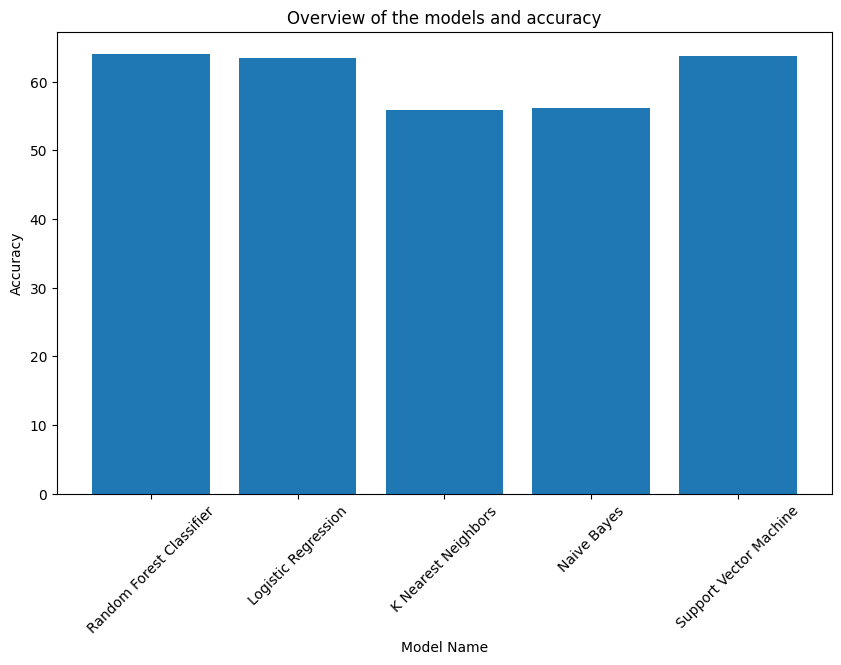

In [ ]:

"""
The provided code snippet creates a DataFrame named `accuracy_data` using the lists `model_lis` and `accuracy_lis`, which store model names and their corresponding accuracy scores, respectively. Subsequently, a bar plot is generated using Matplotlib, illustrating the accuracy of each model. The x-axis represents the model names, while the y-axis indicates the accuracy scores. The plot is customized with appropriate labels for the axes, rotated x-axis labels for better readability, and a title conveying the purpose of the visualization:
providing an overview of models and their accuracy scores.
Finally, the plot is displayed using the `plt.show()` function.
"""

accuracy_data = pd.DataFrame({'model': model_lis, 'accuracy': accuracy_lis})


plt.figure(figsize=(10, 6))
plt.bar(accuracy_data['model'], accuracy_data['accuracy'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Overview of the models and accuracy')
plt.show()

In [ ]:
accuracy_data

,model,accuracy
0,Random Forest Classifier,64.037855
1,Logistic Regression,63.406940
2,K Nearest Neighbors,55.835962
3,Naive Bayes,56.151420
4,Support Vector Machine,63.722397


In conclusion, Random Forest Classifier model  performed much better than all others.